## Import the dataset


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsa
from sklearn.metrics import accuracy_score

In [134]:
#Dataset is read 
df = pd.read_csv("FinalDataset_forSPP.csv")

In [135]:
#Dropping unwanted columns

#df.drop('HowYouPrepare',axis = 1, inplace = True)
#df.drop('Rate yourself',axis = 1, inplace = True)
#df.drop('TravelMethod',axis = 1, inplace = True)
#df.drop('Gender', axis = 1, inplace = True)

In [136]:
df

,TravelTime,PartTimeJob,Relationship,Father's_education,Mother's_education,StudyHours,AttendenceLecs,Concentrate,Friends,SocialMediaTime,extra curricular,StudyPattern,Marks
0,3,0,0,1,1,2,1,1,1,3,1,1,80 to 89
1,3,0,1,1,2,3,1,1,1,2,1,1,80 to 89
2,4,0,0,3,2,2,2,1,0,3,0,2,60 to 69
3,3,0,1,1,2,4,1,1,1,2,1,1,80 to 89
4,2,0,0,2,1,2,2,1,0,4,0,2,70 to 79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,1,0,0,1,2,1,2,1,1,3,0,2,90 to 100
374,4,1,1,1,2,4,2,1,1,1,1,1,90 to 100
375,3,0,0,2,2,3,2,1,1,2,1,1,90 to 100
376,1,1,1,2,2,2,1,1,1,2,1,1,90 to 100


In [137]:
# Shape of the dataset -> no. of rows=378 & no. of columns=13 (with the mark column)
df.shape

(378, 13)

In [138]:
#Count of the dataset
df.count()

TravelTime            378
PartTimeJob           378
Relationship          378
Father's_education    378
Mother's_education    378
StudyHours            378
AttendenceLecs        378
Concentrate           378
Friends               378
SocialMediaTime       378
extra curricular      378
StudyPattern          378
Marks                 378
dtype: int64

In [139]:
#No null values where discovered
df.isnull().sum()

TravelTime            0
PartTimeJob           0
Relationship          0
Father's_education    0
Mother's_education    0
StudyHours            0
AttendenceLecs        0
Concentrate           0
Friends               0
SocialMediaTime       0
extra curricular      0
StudyPattern          0
Marks                 0
dtype: int64

## Visualization

In [140]:
#No. of data in each mark class
df["Marks"].value_counts()

80 to 89     42
60 to 69     42
70 to 79     42
90 to 100    42
20 to 29     42
50 to 59     42
0 to 20      42
40 to 49     42
30 to 39     42
Name: Marks, dtype: int64

<AxesSubplot:>

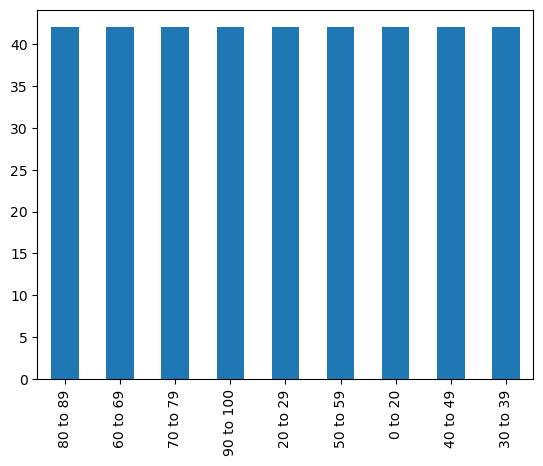

In [141]:
#Visualize count
df["Marks"].value_counts().plot.bar()

In [142]:
#Transpose
df.iloc[:,0:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TravelTime,378.0,2.883598,1.071549,1.0,2.0,3.0,4.0,4.0
PartTimeJob,378.0,0.431217,0.495903,0.0,0.0,0.0,1.0,1.0
Relationship,378.0,0.417989,0.493882,0.0,0.0,0.0,1.0,1.0
Father's_education,378.0,1.563492,0.593904,1.0,1.0,2.0,2.0,3.0
Mother's_education,378.0,1.798942,0.676862,1.0,1.0,2.0,2.0,3.0
StudyHours,378.0,2.272487,1.120030,1.0,1.0,2.0,3.0,5.0
AttendenceLecs,378.0,1.542328,0.573099,1.0,1.0,2.0,2.0,3.0
Concentrate,378.0,1.296296,0.561390,1.0,1.0,1.0,1.0,3.0
Friends,378.0,0.597884,0.490975,0.0,0.0,1.0,1.0,1.0
SocialMediaTime,378.0,2.568783,0.765142,1.0,2.0,3.0,3.0,4.0


<AxesSubplot:>

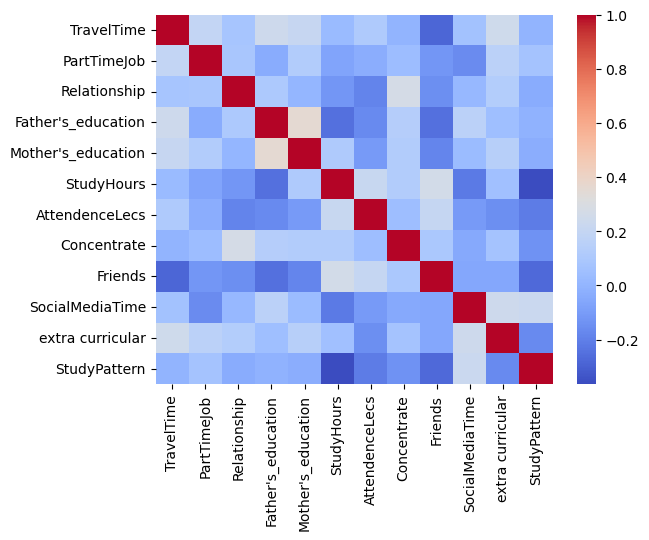

In [143]:
#Heatmap to see correlation

import seaborn as sns

sns.heatmap(df.corr(),cmap = 'coolwarm')

## Train/Test Split

In [144]:
# X and y columns added (X=columns of input, y=Output)
X = df.drop("Marks",axis = 1)
y = df["Marks"]

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3)

X_train.shape, X_test.shape

((264, 12), (114, 12))

In [146]:
from collections import Counter
print(Counter(y_train))


Counter({'50 to 59': 36, '60 to 69': 33, '40 to 49': 32, '20 to 29': 31, '70 to 79': 30, '90 to 100': 28, '80 to 89': 27, '0 to 20': 25, '30 to 39': 22})


## Decision Tree Classifier

In [150]:
from sklearn.tree import DecisionTreeClassifier

decisionModel = DecisionTreeClassifier()
decisionModel.fit(X_train,y_train)

decisionPred = decisionModel.predict(X_test)

decisionPred

array(['20 to 29', '40 to 49', '90 to 100', '0 to 20', '0 to 20',
       '60 to 69', '30 to 39', '30 to 39', '0 to 20', '0 to 20',
       '90 to 100', '90 to 100', '0 to 20', '60 to 69', '20 to 29',
       '30 to 39', '30 to 39', '20 to 29', '40 to 49', '80 to 89',
       '60 to 69', '30 to 39', '80 to 89', '20 to 29', '60 to 69',
       '90 to 100', '30 to 39', '90 to 100', '40 to 49', '30 to 39',
       '0 to 20', '20 to 29', '90 to 100', '20 to 29', '60 to 69',
       '20 to 29', '40 to 49', '20 to 29', '30 to 39', '90 to 100',
       '70 to 79', '30 to 39', '40 to 49', '30 to 39', '50 to 59',
       '30 to 39', '60 to 69', '50 to 59', '70 to 79', '50 to 59',
       '90 to 100', '50 to 59', '30 to 39', '30 to 39', '30 to 39',
       '40 to 49', '50 to 59', '0 to 20', '80 to 89', '90 to 100',
       '40 to 49', '0 to 20', '60 to 69', '0 to 20', '20 to 29',
       '90 to 100', '40 to 49', '40 to 49', '80 to 89', '50 to 59',
       '40 to 49', '90 to 100', '40 to 49', '0 to 20', '80 to

In [151]:
#Accuracy of decision tree model
accuracy_score(y_test,decisionPred)

0.8245614035087719

In [152]:
pd.crosstab(y_test,decisionPred)

col_0,0 to 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100
Marks,,,,,,,,,
0 to 20,17,0,0,0,0,0,0,0,0
20 to 29,0,11,0,0,0,0,0,0,0
30 to 39,0,0,20,0,0,0,0,0,0
40 to 49,0,1,0,9,0,0,0,0,0
50 to 59,0,0,0,0,6,0,0,0,0
60 to 69,0,0,1,0,0,8,0,0,0
70 to 79,0,2,1,2,2,1,3,1,0
80 to 89,0,0,0,1,1,4,2,6,1
90 to 100,0,0,0,0,0,0,0,0,14


In [153]:
from sklearn.metrics import classification_report

print(classification_report(y_test,decisionPred))

              precision    recall  f1-score   support

     0 to 20       1.00      1.00      1.00        17
    20 to 29       0.79      1.00      0.88        11
    30 to 39       0.91      1.00      0.95        20
    40 to 49       0.75      0.90      0.82        10
    50 to 59       0.67      1.00      0.80         6
    60 to 69       0.62      0.89      0.73         9
    70 to 79       0.60      0.25      0.35        12
    80 to 89       0.86      0.40      0.55        15
   90 to 100       0.93      1.00      0.97        14

    accuracy                           0.82       114
   macro avg       0.79      0.83      0.78       114
weighted avg       0.82      0.82      0.80       114



## Random Forest Classifier

In [154]:
from sklearn.ensemble import RandomForestClassifier

randForestModel = RandomForestClassifier()
randForestModel.fit(X_train, y_train)

randForestPred = randForestModel.predict(X_test)
randForestPred

array(['20 to 29', '40 to 49', '90 to 100', '0 to 20', '0 to 20',
       '60 to 69', '30 to 39', '30 to 39', '0 to 20', '0 to 20',
       '90 to 100', '90 to 100', '0 to 20', '60 to 69', '20 to 29',
       '30 to 39', '30 to 39', '20 to 29', '70 to 79', '80 to 89',
       '60 to 69', '30 to 39', '80 to 89', '20 to 29', '60 to 69',
       '90 to 100', '30 to 39', '90 to 100', '40 to 49', '30 to 39',
       '0 to 20', '20 to 29', '90 to 100', '20 to 29', '60 to 69',
       '70 to 79', '40 to 49', '20 to 29', '30 to 39', '80 to 89',
       '70 to 79', '30 to 39', '40 to 49', '30 to 39', '80 to 89',
       '30 to 39', '60 to 69', '50 to 59', '70 to 79', '50 to 59',
       '90 to 100', '50 to 59', '30 to 39', '30 to 39', '30 to 39',
       '40 to 49', '50 to 59', '0 to 20', '80 to 89', '90 to 100',
       '40 to 49', '0 to 20', '50 to 59', '0 to 20', '20 to 29',
       '90 to 100', '40 to 49', '50 to 59', '80 to 89', '50 to 59',
       '40 to 49', '90 to 100', '40 to 49', '0 to 20', '80 to 

In [155]:
#Accuracy of random forest model
accuracy_score(y_test,randForestPred)

0.868421052631579

In [156]:
pd.crosstab(y_test,randForestPred)

col_0,0 to 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100
Marks,,,,,,,,,
0 to 20,17,0,0,0,0,0,0,0,0
20 to 29,0,11,0,0,0,0,0,0,0
30 to 39,0,0,20,0,0,0,0,0,0
40 to 49,0,1,0,9,0,0,0,0,0
50 to 59,0,0,0,0,6,0,0,0,0
60 to 69,0,0,1,0,0,8,0,0,0
70 to 79,0,0,1,1,2,1,6,1,0
80 to 89,0,0,0,0,2,2,3,8,0
90 to 100,0,0,0,0,0,0,0,0,14


In [157]:
from sklearn.metrics import classification_report

print(classification_report(y_test,randForestPred))

              precision    recall  f1-score   support

     0 to 20       1.00      1.00      1.00        17
    20 to 29       0.92      1.00      0.96        11
    30 to 39       0.91      1.00      0.95        20
    40 to 49       0.90      0.90      0.90        10
    50 to 59       0.60      1.00      0.75         6
    60 to 69       0.73      0.89      0.80         9
    70 to 79       0.67      0.50      0.57        12
    80 to 89       0.89      0.53      0.67        15
   90 to 100       1.00      1.00      1.00        14

    accuracy                           0.87       114
   macro avg       0.85      0.87      0.84       114
weighted avg       0.87      0.87      0.86       114



## Support vector machine Classifier

In [158]:
from sklearn import svm

svm_model= svm.SVC(decision_function_shape='ovo')
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
svm_pred

array(['20 to 29', '40 to 49', '70 to 79', '0 to 20', '0 to 20',
       '80 to 89', '30 to 39', '30 to 39', '0 to 20', '0 to 20',
       '90 to 100', '90 to 100', '0 to 20', '80 to 89', '60 to 69',
       '30 to 39', '60 to 69', '40 to 49', '80 to 89', '60 to 69',
       '60 to 69', '0 to 20', '80 to 89', '20 to 29', '60 to 69',
       '90 to 100', '30 to 39', '90 to 100', '40 to 49', '30 to 39',
       '0 to 20', '20 to 29', '90 to 100', '20 to 29', '60 to 69',
       '80 to 89', '40 to 49', '40 to 49', '60 to 69', '90 to 100',
       '70 to 79', '0 to 20', '40 to 49', '60 to 69', '80 to 89',
       '30 to 39', '80 to 89', '50 to 59', '70 to 79', '80 to 89',
       '90 to 100', '50 to 59', '60 to 69', '0 to 20', '30 to 39',
       '80 to 89', '60 to 69', '0 to 20', '80 to 89', '90 to 100',
       '40 to 49', '0 to 20', '50 to 59', '0 to 20', '20 to 29',
       '90 to 100', '40 to 49', '80 to 89', '60 to 69', '50 to 59',
       '40 to 49', '90 to 100', '40 to 49', '0 to 20', '80 to 89'

In [159]:
accuracy_score(y_test,svm_pred)

0.6578947368421053

In [160]:
pd.crosstab(y_test,svm_pred)

col_0,0 to 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100
Marks,,,,,,,,,
0 to 20,17,0,0,0,0,0,0,0,0
20 to 29,0,7,0,2,0,2,0,0,0
30 to 39,5,0,11,0,0,4,0,0,0
40 to 49,0,0,0,10,0,0,0,0,0
50 to 59,0,0,0,0,4,2,0,0,0
60 to 69,1,1,0,0,0,4,0,2,1
70 to 79,0,0,1,2,2,2,1,4,0
80 to 89,0,0,0,0,1,2,3,8,1
90 to 100,0,0,0,0,0,0,1,0,13


In [161]:
from sklearn.metrics import classification_report

print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

     0 to 20       0.74      1.00      0.85        17
    20 to 29       0.88      0.64      0.74        11
    30 to 39       0.92      0.55      0.69        20
    40 to 49       0.71      1.00      0.83        10
    50 to 59       0.57      0.67      0.62         6
    60 to 69       0.25      0.44      0.32         9
    70 to 79       0.20      0.08      0.12        12
    80 to 89       0.57      0.53      0.55        15
   90 to 100       0.87      0.93      0.90        14

    accuracy                           0.66       114
   macro avg       0.63      0.65      0.62       114
weighted avg       0.67      0.66      0.64       114



## Ensemble Model

In [162]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


estimators_list = [('model1',decisionModel),('model2',randForestModel),('model3',svm_model)]

pipe = make_pipeline(StandardScaler(), StackingClassifier(estimators = estimators_list, final_estimator = LogisticRegression(max_iter=2000)))
                     
pipe.fit(X_train, y_train)

stackPred = pipe.predict(X_test)
stackPred


array(['20 to 29', '40 to 49', '90 to 100', '0 to 20', '0 to 20',
       '60 to 69', '30 to 39', '30 to 39', '0 to 20', '0 to 20',
       '90 to 100', '90 to 100', '0 to 20', '60 to 69', '20 to 29',
       '30 to 39', '30 to 39', '40 to 49', '70 to 79', '80 to 89',
       '60 to 69', '30 to 39', '80 to 89', '20 to 29', '60 to 69',
       '90 to 100', '30 to 39', '90 to 100', '40 to 49', '30 to 39',
       '0 to 20', '20 to 29', '90 to 100', '20 to 29', '60 to 69',
       '80 to 89', '40 to 49', '40 to 49', '30 to 39', '90 to 100',
       '70 to 79', '30 to 39', '40 to 49', '30 to 39', '80 to 89',
       '30 to 39', '60 to 69', '50 to 59', '80 to 89', '70 to 79',
       '90 to 100', '50 to 59', '30 to 39', '30 to 39', '30 to 39',
       '40 to 49', '50 to 59', '0 to 20', '80 to 89', '90 to 100',
       '40 to 49', '0 to 20', '60 to 69', '0 to 20', '20 to 29',
       '90 to 100', '40 to 49', '80 to 89', '80 to 89', '50 to 59',
       '40 to 49', '90 to 100', '40 to 49', '0 to 20', '80 to

In [163]:
stackPredProba = pipe.predict_proba(X_test)

#9 classes were correctly predicted
stackPredProba.shape

(114, 9)

In [164]:
#Shape of the prediction
stackPred.shape

(114,)

In [165]:
accuracy_score(y_test,stackPred)

0.8245614035087719

In [166]:
pd.crosstab(y_test,stackPred)

col_0,0 to 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100
Marks,,,,,,,,,
0 to 20,17,0,0,0,0,0,0,0,0
20 to 29,0,9,0,2,0,0,0,0,0
30 to 39,0,0,20,0,0,0,0,0,0
40 to 49,0,0,0,10,0,0,0,0,0
50 to 59,0,0,0,0,6,0,0,0,0
60 to 69,0,1,0,0,0,7,1,0,0
70 to 79,0,0,1,2,0,3,2,4,0
80 to 89,0,0,0,0,0,3,2,9,1
90 to 100,0,0,0,0,0,0,0,0,14


In [167]:
from sklearn.metrics import classification_report

print(classification_report(y_test,stackPred))

              precision    recall  f1-score   support

     0 to 20       1.00      1.00      1.00        17
    20 to 29       0.90      0.82      0.86        11
    30 to 39       0.95      1.00      0.98        20
    40 to 49       0.71      1.00      0.83        10
    50 to 59       1.00      1.00      1.00         6
    60 to 69       0.54      0.78      0.64         9
    70 to 79       0.40      0.17      0.24        12
    80 to 89       0.69      0.60      0.64        15
   90 to 100       0.93      1.00      0.97        14

    accuracy                           0.82       114
   macro avg       0.79      0.82      0.79       114
weighted avg       0.81      0.82      0.81       114



## ROC Curve for Stacking ensemble model

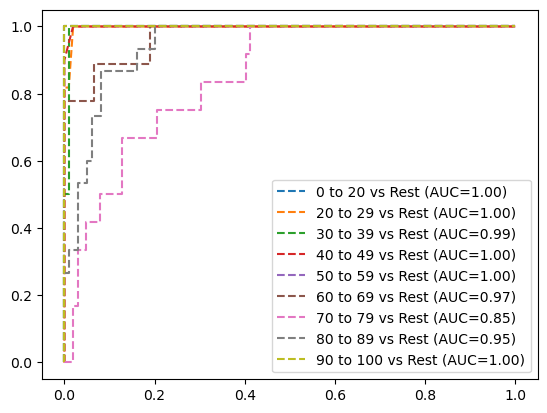

In [168]:
#Multiclass ROC curve - One vs Rest 
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
#binarizing the y_test values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

classes=np.unique(y_test)
n_class = classes.shape[0]


falsePositiveRate = {}
truePositiveRate = {}
threshold = {}

roc_auc = dict()


for i in range(n_class):
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test_binarized[:,i], stackPredProba[:,i])
    roc_auc[i] = auc(falsePositiveRate[i], truePositiveRate[i])
    
    #Plotting curve
    plt.plot(falsePositiveRate[i], truePositiveRate[i], linestyle="--",
            label = "%s vs Rest (AUC=%0.2f)"%(classes[i],roc_auc[i]))
    

plt.legend(loc='lower right')
plt.show()

## ROC Curve for Each Classifieer

## Cross Validation

In [169]:
from sklearn.model_selection import StratifiedKFold
#10 folds
kf = StratifiedKFold(n_splits= 10)
kf

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [170]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test,y_test)

In [171]:
scores_model = []

X = df.drop("Marks",axis = 1)
y = df["Marks"]


for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.loc[test_index]
    scores_model.append(get_score(pipe, X_train, X_test, y_train, y_test))


In [172]:
scores_model

[0.7894736842105263,
 0.631578947368421,
 0.8157894736842105,
 0.8157894736842105,
 0.7368421052631579,
 0.8947368421052632,
 0.8421052631578947,
 0.8421052631578947,
 0.7837837837837838,
 0.8648648648648649]